# Importing Libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Scrapping stats from past seasons

df = pd.DataFrame(split_data)
df

In order to be able to work fluently, I've decided to dowload df as a csv and use it for the model instead of using the live data.  
The results should be the same as the live data is actualised at the end of each season.  
In case anyone would like to use the model in the future, he could just use the code from above for scrapping.

# Reading data

In [2]:
df = pd.read_csv('NHL_players_NaN_1.csv')

In [3]:
pd.set_option('display.max_columns', 29)

In [4]:
df 

,name,position,country,birthday,id,height,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,time_1,plus_minus_1,goals_2,assists_2,pim_2,games_2,hits_2,shots_2,time_2,plus_minus_2,season_1,season_2,season_3,ppg_3,team_1,team_2
0,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20012002,20022003,20032004,0.285714,NaN,NaN
1,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,0,6,12,21,15,31,191:28,1,0,0,0,0,0,0,0,0,20032004,20042005,20052006,0.611940,Anaheim Ducks,NaN
2,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,0,0,0,0,0,0,0,0,19,22,69,67,86,149,947:12,19,20042005,20052006,20062007,0.740741,NaN,Anaheim Ducks
3,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,19,22,69,67,86,149,947:12,19,25,35,81,81,159,180,1381:09,23,20052006,20062007,20072008,0.609756,Anaheim Ducks,Anaheim Ducks
4,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,25,35,81,81,159,180,1381:09,23,21,29,80,82,159,196,1386:11,8,20062007,20072008,20082009,0.900000,Anaheim Ducks,Anaheim Ducks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Filip Kuba,D,CZE,1976-12-29,8462225,"6' 4""",225,3,25,28,53,27,90,1211:03,-5,2,14,16,64,23,76,1326:42,-26,20092010,20102011,20112012,0.438356,Ottawa Senators,Ottawa Senators
12051,Filip Kuba,D,CZE,1976-12-29,8462225,"6' 4""",225,2,14,16,64,23,76,1326:42,-26,6,26,26,73,53,78,1723:48,26,20102011,20112012,20122013,0.227273,Ottawa Senators,Ottawa Senators
12052,Danny Markov,D,RUS,1976-07-30,8462258,"6' 1""",186,6,30,67,72,208,103,1649:55,-7,4,16,36,64,65,105,1489:12,2,20012002,20022003,20032004,0.147059,Phoenix Coyotes,Phoenix Coyotes
12053,Danny Markov,D,RUS,1976-07-30,8462258,"6' 1""",186,2,3,58,34,53,27,723:20,0,0,0,0,0,0,0,0,0,20032004,20042005,20052006,0.189655,Philadelphia Flyers,NaN


In [5]:
round(df.describe(),2)

,id,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,plus_minus_1,goals_2,assists_2,pim_2,games_2,hits_2,shots_2,plus_minus_2,season_1,season_2,season_3,ppg_3
count,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00,12055.00
mean,8470670.63,203.90,7.43,12.52,28.42,43.54,52.53,77.72,0.59,7.91,13.39,29.88,47.30,55.08,83.29,0.39,20100233.97,20110234.97,20120235.97,0.39
std,6015.29,15.62,9.33,13.87,33.14,32.72,56.17,76.12,9.25,9.28,13.75,31.88,30.76,54.80,74.14,9.54,48940.76,48940.76,48940.76,0.27
min,8444919.00,153.00,0.00,0.00,0.00,0.00,0.00,0.00,-46.00,0.00,0.00,0.00,0.00,0.00,0.00,-42.00,20012002.00,20022003.00,20032004.00,0.00
25%,8468085.00,193.00,0.00,0.00,0.00,2.50,2.00,2.00,-3.00,0.00,2.00,5.00,16.00,11.00,16.00,-4.00,20062007.00,20072008.00,20082009.00,0.18
50%,8471262.00,204.00,4.00,8.00,20.00,51.00,38.00,63.00,0.00,4.00,10.00,22.00,57.00,42.00,72.00,0.00,20102011.00,20112012.00,20122013.00,0.33
75%,8475174.50,215.00,12.00,20.00,42.00,76.00,81.00,128.00,4.00,12.00,21.00,43.00,76.00,82.00,131.00,4.00,20142015.00,20152016.00,20162017.00,0.54
max,8481481.00,265.00,65.00,92.00,354.00,82.00,382.00,528.00,50.00,65.00,92.00,324.00,82.00,382.00,528.00,52.00,20182019.00,20192020.00,20202021.00,1.88


In [6]:
# list of seasons to consider
year_list = ['20012002', '20022003', '20032004', '20042005', '20052006', '20062007', '20072008', '20082009', '20092010', '20102011', '20112012', '20122013', '20132014', '20142015', '20152016', '20162017', '20172018', '20182019', '20192020', '20202021']

In [7]:
games_per_season = []
for season in tqdm(year_list):
    res = requests.get("https://statsapi.web.nhl.com/api/v1/standings?season={}".format(season))
    for division in res.json()['records']:
        for team in division['teamRecords']:
            games_per_season.append({'season': season, 'games_per_season': team['gamesPlayed']})

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
games_season = pd.DataFrame(games_per_season)

In [9]:
games_season.shape

(574, 2)

In [10]:
games_season = games_season.drop_duplicates()
games_season = games_season.reset_index(drop = True)
games_season

,season,games_per_season
0,20012002,82
1,20022003,82
2,20032004,82
3,20052006,82
4,20062007,82
5,20072008,82
6,20082009,82
7,20092010,82
8,20102011,82
9,20112012,82


In [11]:
games_season['season'].values

array(['20012002', '20022003', '20032004', '20052006', '20062007',
       '20072008', '20082009', '20092010', '20102011', '20112012',
       '20122013', '20132014', '20142015', '20152016', '20162017',
       '20172018', '20182019', '20192020', '20192020', '20192020',
       '20192020', '20202021'], dtype=object)

# Exploratory Data Analysis - *EDA*

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          12055 non-null  object 
 1   position      12055 non-null  object 
 2   country       12055 non-null  object 
 3   birthday      12055 non-null  object 
 4   id            12055 non-null  int64  
 5   height        12055 non-null  object 
 6   weight        12055 non-null  int64  
 7   goals_1       12055 non-null  int64  
 8   assists_1     12055 non-null  int64  
 9   pim_1         12055 non-null  int64  
 10  games_1       12055 non-null  int64  
 11  hits_1        12055 non-null  int64  
 12  shots_1       12055 non-null  int64  
 13  time_1        12055 non-null  object 
 14  plus_minus_1  12055 non-null  int64  
 15  goals_2       12055 non-null  int64  
 16  assists_2     12055 non-null  int64  
 17  pim_2         12055 non-null  int64  
 18  games_2       12055 non-nu

In [13]:
df.columns

Index(['name', 'position', 'country', 'birthday', 'id', 'height', 'weight',
       'goals_1', 'assists_1', 'pim_1', 'games_1', 'hits_1', 'shots_1',
       'time_1', 'plus_minus_1', 'goals_2', 'assists_2', 'pim_2', 'games_2',
       'hits_2', 'shots_2', 'time_2', 'plus_minus_2', 'season_1', 'season_2',
       'season_3', 'ppg_3', 'team_1', 'team_2'],
      dtype='object')

## Dealing with nulls

In [14]:
## in this case, nulls mean that the player hasn't play in the league at least one of the seasons, so 

df = df.dropna()

In [15]:
df.shape

(8498, 29)

In [16]:
df = df.reset_index(drop = True)

In [17]:
df.head(50)

,name,position,country,birthday,id,height,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,time_1,plus_minus_1,goals_2,assists_2,pim_2,games_2,hits_2,shots_2,time_2,plus_minus_2,season_1,season_2,season_3,ppg_3,team_1,team_2
0,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,19,22,69,67,86,149,947:12,19,25,35,81,81,159,180,1381:09,23,20052006,20062007,20072008,0.609756,Anaheim Ducks,Anaheim Ducks
1,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,25,35,81,81,159,180,1381:09,23,21,29,80,82,159,196,1386:11,8,20062007,20072008,20082009,0.900000,Anaheim Ducks,Anaheim Ducks
2,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,21,29,80,82,159,196,1386:11,8,7,11,16,20,59,39,325:34,3,20072008,20082009,20092010,0.640000,Anaheim Ducks,Pittsburgh Penguins
3,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,7,11,16,20,59,39,325:34,3,13,19,39,50,112,131,821:44,3,20082009,20092010,20102011,0.727273,Pittsburgh Penguins,Pittsburgh Penguins
4,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,13,19,39,50,112,131,821:44,3,23,25,47,66,155,133,1206:28,18,20092010,20102011,20112012,0.743902,Pittsburgh Penguins,Pittsburgh Penguins
5,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,23,25,47,66,155,133,1206:28,18,26,35,49,82,180,230,1501:48,16,20102011,20112012,20122013,1.083333,Pittsburgh Penguins,Pittsburgh Penguins
6,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,26,35,49,82,180,230,1501:48,16,22,30,39,48,104,113,865:04,30,20112012,20122013,20132014,0.871795,Pittsburgh Penguins,Pittsburgh Penguins
7,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,22,30,39,48,104,113,865:04,30,35,33,66,78,157,218,1494:16,25,20122013,20132014,20142015,0.540541,Pittsburgh Penguins,Pittsburgh Penguins
8,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,35,33,66,78,157,218,1494:16,25,17,23,56,74,211,170,1323:47,2,20132014,20142015,20152016,0.500000,Pittsburgh Penguins,Pittsburgh Penguins
9,Chris Kunitz,L,CAN,1979-09-26,8470543,"6' 0""",188,17,23,56,74,211,170,1323:47,2,17,23,41,80,264,150,1345:58,29,20142015,20152016,20162017,0.408451,Pittsburgh Penguins,Pittsburgh Penguins


## Transforming measurement units

### Weight

In [18]:
df['weight'].unique()

array([188, 197, 185, 178, 200, 195, 229, 203, 214, 225, 224, 222, 219,
       205, 220, 193, 209, 201, 215, 206, 196, 230, 245, 186, 179, 191,
       194, 204, 208, 189, 177, 190, 231, 192, 165, 234, 182, 175, 216,
       187, 210, 202, 183, 180, 260, 213, 226, 207, 184, 170, 247, 218,
       223, 212, 173, 176, 232, 181, 217, 227, 198, 240, 211, 199, 153,
       233, 235, 228, 252, 174, 221, 250, 258, 242, 246, 238, 158, 160,
       166, 241, 243, 237, 255, 244, 239, 172, 265, 253, 236, 171, 168])

In [19]:
## weight is measured in pounds - transform it to kilo grams which are the units that I'm used to

df['weight'] = df['weight'] * 0.45359237 # convertion ratio
df['weight'] = round(df['weight'], 2)

### Height

In [20]:
df['height'].unique()

array(['6\' 0"', '5\' 10"', '5\' 11"', '6\' 4"', '6\' 2"', '6\' 1"',
       '6\' 5"', '6\' 3"', '6\' 6"', '5\' 9"', '5\' 7"', '6\' 7"',
       '5\' 8"', '5\' 4"', '6\' 8"', '6\' 9"', '5\' 6"'], dtype=object)

In [21]:
## height is measured in feet and inches - transform to centimeters

def get_cms(height):
    feet, inches = height.replace("' ", ",").replace("\"", "").split(",")
    return round(((int(feet) * 12 + int(inches)) * 2.54), 2)

df['height'] = df['height'].apply(get_cms)

## Changing columns type

### Birthday

In [22]:
import time
from datetime import date

In [23]:
# use the player's birthday to obtain his age in his 3rd season
df['season_3'] = df['season_3'].astype(str)
df['age'] = df['season_3'].apply(lambda t: int(t[:4])) - df['birthday'].apply(lambda t: int(t.split('-')[0]))

In [24]:
df['birthday']=pd.to_datetime(df['birthday'], errors = "coerce") # changing type to DateTime

## Creating 'games per season' columns

In [25]:
df['games_per_season_1'] = df.apply(lambda _: '', axis=1)
df['games_per_season_2'] = df.apply(lambda _: '', axis=1)

In [26]:
for i in range(len(df['season_1'])):
    if df['season_1'].values[i] == 20122013:
        df['games_per_season_1'][i] = 48
    elif df['season_1'].values[i] == 20192020:
        df['games_per_season_1'][i] = 70
    elif df['season_1'].values[i] == 20202021:
        df['games_per_season_1'][i] = 56
    elif df['season_1'].values[i] == 20012002 or 20022003 or 20032004 or 20052006 or 20062007 or 20072008 or 20082009 or 20092010 or 20102011 or 20112012 or 20132014 or 20142015 or 20152016 or 20162017 or 20172018 or 20182019:
        df['games_per_season_1'][i] = 82

In [27]:
for i in range(len(df['season_2'])):
    if df['season_2'].values[i] == 20122013:
        df['games_per_season_2'][i] = 48
    elif df['season_2'].values[i] == 20192020:
        df['games_per_season_2'][i] = 70
    elif df['season_2'].values[i] == 20202021:
        df['games_per_season_2'][i] = 56
    elif df['season_2'].values[i] == 20012002 or 20022003 or 20032004 or 20052006 or 20062007 or 20072008 or 20082009 or 20092010 or 20102011 or 20112012 or 20132014 or 20142015 or 20152016 or 20162017 or 20172018 or 20182019:
        df['games_per_season_2'][i] = 82

In [28]:
df['games_per_season_1'] = df['games_per_season_1'].astype(int)
df['games_per_season_2'] = df['games_per_season_2'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                8498 non-null   object        
 1   position            8498 non-null   object        
 2   country             8498 non-null   object        
 3   birthday            8498 non-null   datetime64[ns]
 4   id                  8498 non-null   int64         
 5   height              8498 non-null   float64       
 6   weight              8498 non-null   float64       
 7   goals_1             8498 non-null   int64         
 8   assists_1           8498 non-null   int64         
 9   pim_1               8498 non-null   int64         
 10  games_1             8498 non-null   int64         
 11  hits_1              8498 non-null   int64         
 12  shots_1             8498 non-null   int64         
 13  time_1              8498 non-null   object      

## Changing columns format

### Time - *Time_1* & *Time_2*

In [30]:
df['time_1'] = df['time_1'].apply(lambda i: int(str(i).split(':')[0]))
df['time_2'] = df['time_2'].apply(lambda i: int(str(i).split(':')[0]))

### Seasons

In [31]:
# season 1
df['season_1'] = df['season_1'].apply(lambda i: (str(i)[:4]) + '-' + (str(i))[4:])
df['season_1'] = df['season_1'].apply(lambda i: str(i)[2:5] + str(i)[7:])

# season 2
df['season_2'] = df['season_2'].apply(lambda e: (str(e)[:4]) + '-' + (str(e))[4:])
df['season_2'] = df['season_2'].apply(lambda e: str(e)[2:5] + str(e)[7:])

#season 3
df['season_3'] = df['season_3'].apply(lambda a: (str(a)[:4]) + '-' + (str(a))[4:])
df['season_3'] = df['season_3'].apply(lambda a: str(a)[2:5] + str(a)[7:])

In [32]:
df.head()

,name,position,country,birthday,id,height,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,time_1,...,games_2,hits_2,shots_2,time_2,plus_minus_2,season_1,season_2,season_3,ppg_3,team_1,team_2,age,games_per_season_1,games_per_season_2
0,Chris Kunitz,L,CAN,1979-09-26,8470543,182.88,85.28,19,22,69,67,86,149,947,...,81,159,180,1381,23,05-06,06-07,07-08,0.609756,Anaheim Ducks,Anaheim Ducks,28,82,82
1,Chris Kunitz,L,CAN,1979-09-26,8470543,182.88,85.28,25,35,81,81,159,180,1381,...,82,159,196,1386,8,06-07,07-08,08-09,0.900000,Anaheim Ducks,Anaheim Ducks,29,82,82
2,Chris Kunitz,L,CAN,1979-09-26,8470543,182.88,85.28,21,29,80,82,159,196,1386,...,20,59,39,325,3,07-08,08-09,09-10,0.640000,Anaheim Ducks,Pittsburgh Penguins,30,82,82
3,Chris Kunitz,L,CAN,1979-09-26,8470543,182.88,85.28,7,11,16,20,59,39,325,...,50,112,131,821,3,08-09,09-10,10-11,0.727273,Pittsburgh Penguins,Pittsburgh Penguins,31,82,82
4,Chris Kunitz,L,CAN,1979-09-26,8470543,182.88,85.28,13,19,39,50,112,131,821,...,66,155,133,1206,18,09-10,10-11,11-12,0.743902,Pittsburgh Penguins,Pittsburgh Penguins,32,82,82


## Creating 'points' columns

In [33]:
df['ppg_1'] = (df['goals_1'] + df['assists_1']) / df['games_1']
df['ppg_2'] = (df['goals_2'] + df['assists_2']) / df['games_2']

## Converting total stats into stats per game

In [34]:
df['games_1'] = df['games_1'] / df['games_per_season_1']
df['games_2'] = df['games_2'] / df['games_per_season_2']
df['goals_1'] = df['goals_1'] / df['games_1']
df['goals_2'] = df['goals_2'] / df['games_2']
df['hits_1'] = df['hits_1'] / df['games_1']
df['hits_2'] = df['hits_2'] / df['games_2']
df['pim_1'] = df['pim_1'] / df['games_1']
df['pim_2'] = df['pim_2'] / df['games_2']

# there are some columns that doesn't need to be divided by games:
# ['plus_minus_1', 'plus_minus_2', 'position', 'ppg_3', 'weight', 'height']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8498 entries, 0 to 8497
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                8498 non-null   object        
 1   position            8498 non-null   object        
 2   country             8498 non-null   object        
 3   birthday            8498 non-null   datetime64[ns]
 4   id                  8498 non-null   int64         
 5   height              8498 non-null   float64       
 6   weight              8498 non-null   float64       
 7   goals_1             8498 non-null   float64       
 8   assists_1           8498 non-null   int64         
 9   pim_1               8498 non-null   float64       
 10  games_1             8498 non-null   float64       
 11  hits_1              8498 non-null   float64       
 12  shots_1             8498 non-null   int64         
 13  time_1              8498 non-null   int64       

## Dealing with outliers

### Visualising outliers

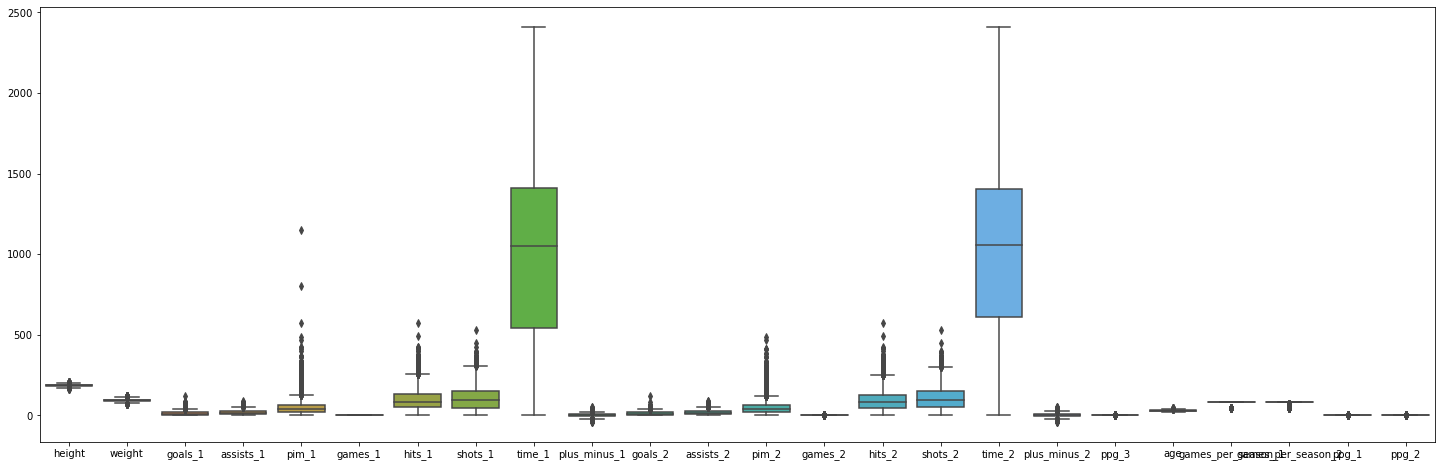

In [36]:
plt.figure(figsize = (25, 8))
sns.boxplot(data=df.drop(['id'], axis = 1));

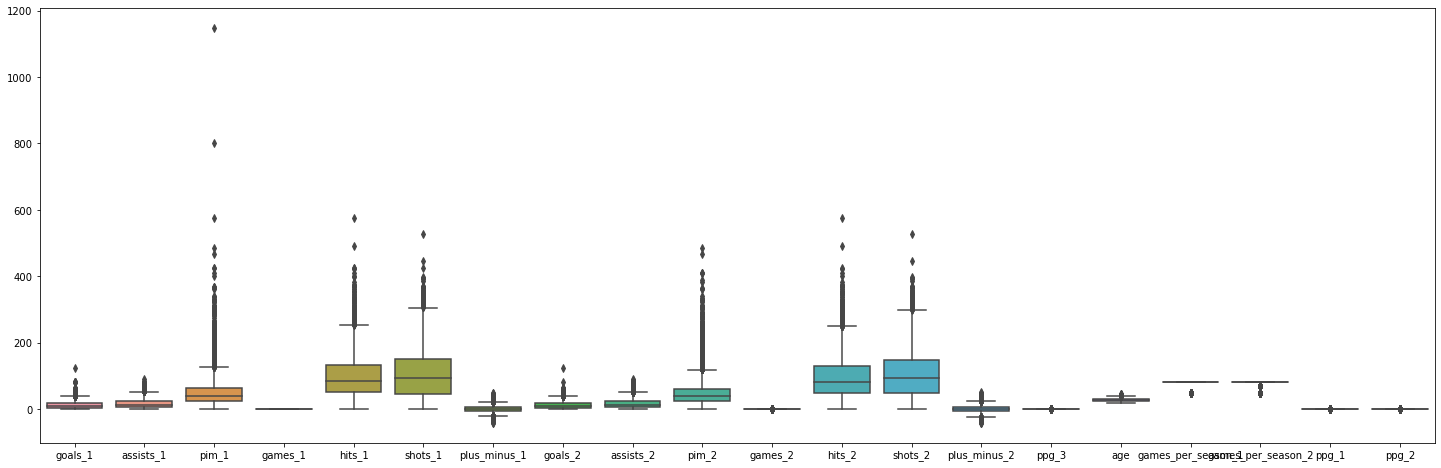

In [37]:
plt.figure(figsize = (25, 8))
sns.boxplot(data=df.drop(['id', 'height', 'weight', 'time_1', 'time_2'], axis = 1));

### Dropping some outliers

In [38]:
df = df[df['pim_1']<450]
df = df[df['pim_2']<450]
df = df.reset_index(drop = True)

In [39]:
df.shape

(8491, 34)

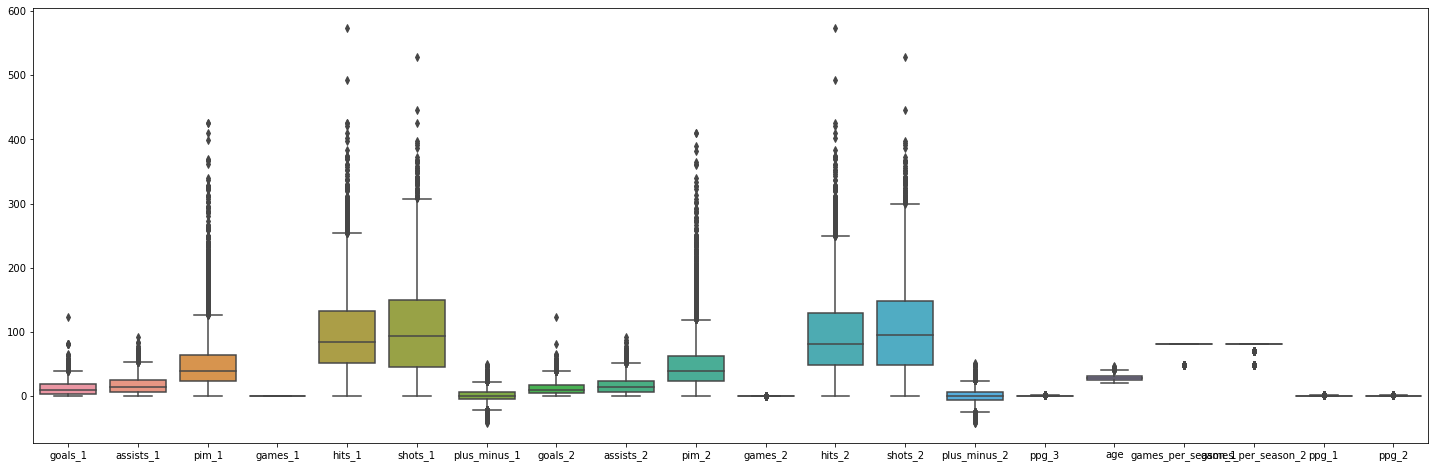

In [40]:
plt.figure(figsize = (25, 8))
sns.boxplot(data=df.drop(['id', 'height', 'weight', 'time_1', 'time_2'], axis = 1));

In [41]:
df = df[df['hits_1']<450]
df = df[df['hits_2']<450]
df = df[df['shots_1']<420]
df = df[df['shots_2']<420]
df = df[df['goals_1']<100]
df = df[df['goals_2']<100]
df = df.reset_index(drop = True)

In [42]:
df.shape

(8481, 34)

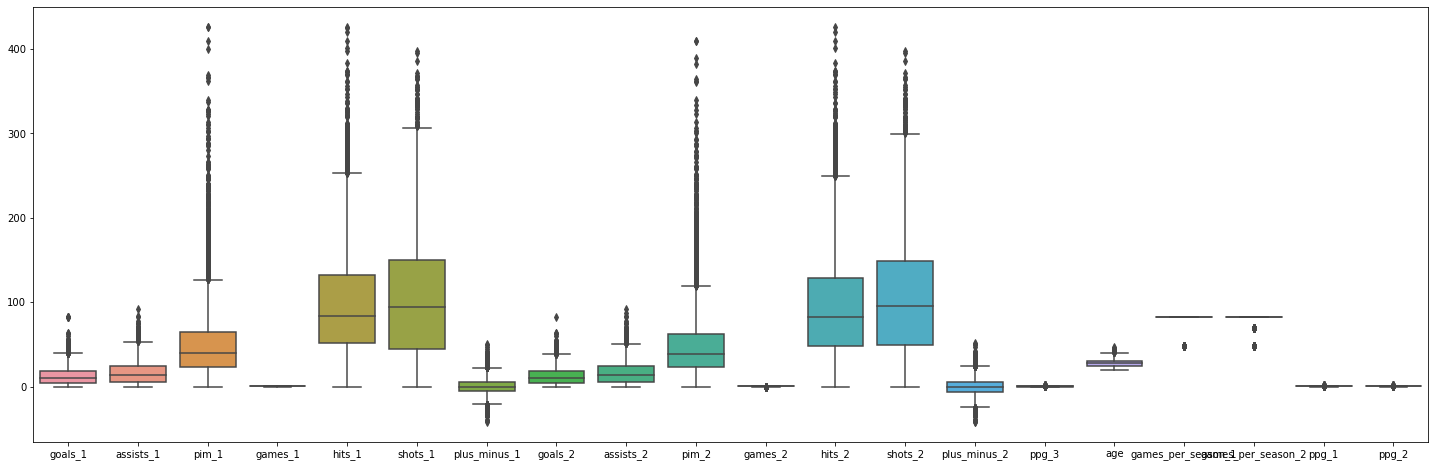

In [43]:
plt.figure(figsize = (25, 8))
sns.boxplot(data=df.drop(['id', 'height', 'weight', 'time_1', 'time_2'], axis = 1));

In [44]:
df = df[df['games_per_season_1']>80]
df = df[df['games_per_season_2']>80]

## Finding correlations

### Visualisation

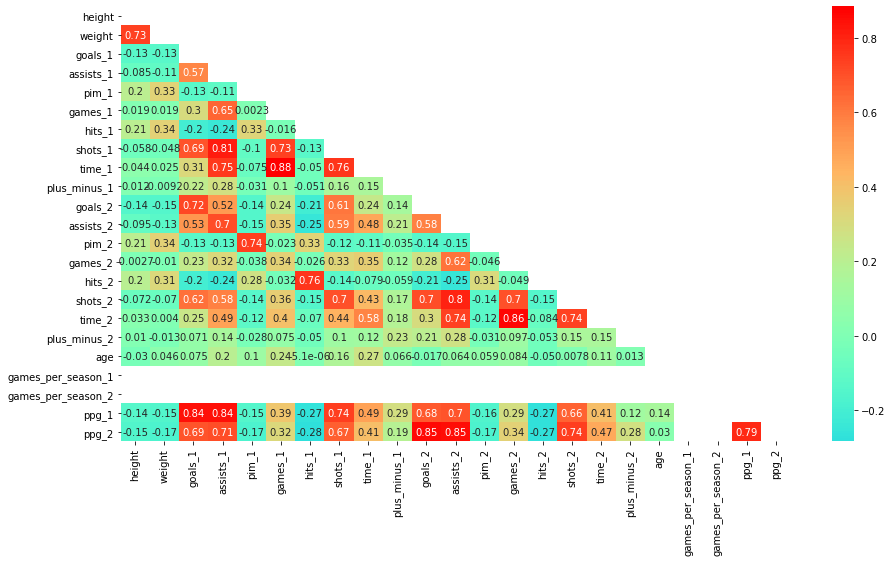

In [45]:
mask = np.zeros_like(df.drop(['id', 'ppg_3'], axis=1).corr())
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize = (15, 8))
sns.heatmap(df.drop(['id','ppg_3'], axis=1).corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='rainbow')
plt.show();

### Dropping some correlated columns

In [46]:
df = df.drop(['shots_1', 'shots_2', 'time_1', 'time_2'], axis = 1) # correlation > 0.8 - leaving goals and assists

## Checking if there's any player that hasn't play at least 1 game in each season

In [47]:
print(df['games_1'].min() * 82)
print(df['games_2'].min() * 82)

1.0
1.0


There's no player that hasn't played at least 1 game per season

## Selecting relevant features for my modeling

In [48]:
# after trying dropping and leaving different features, the best results where obtained with these columns
df_f = df[['games_1', 'games_2', 'goals_1', 'goals_2',
           'height', 'hits_1', 'hits_2', 'pim_1',
           'pim_2', 'plus_minus_1', 'plus_minus_2', 'assists_1', 'assists_2', 'position',
           'ppg_3', 'ppg_1', 'ppg_2', 'age']]

## Plotting the data in a scatter matrix

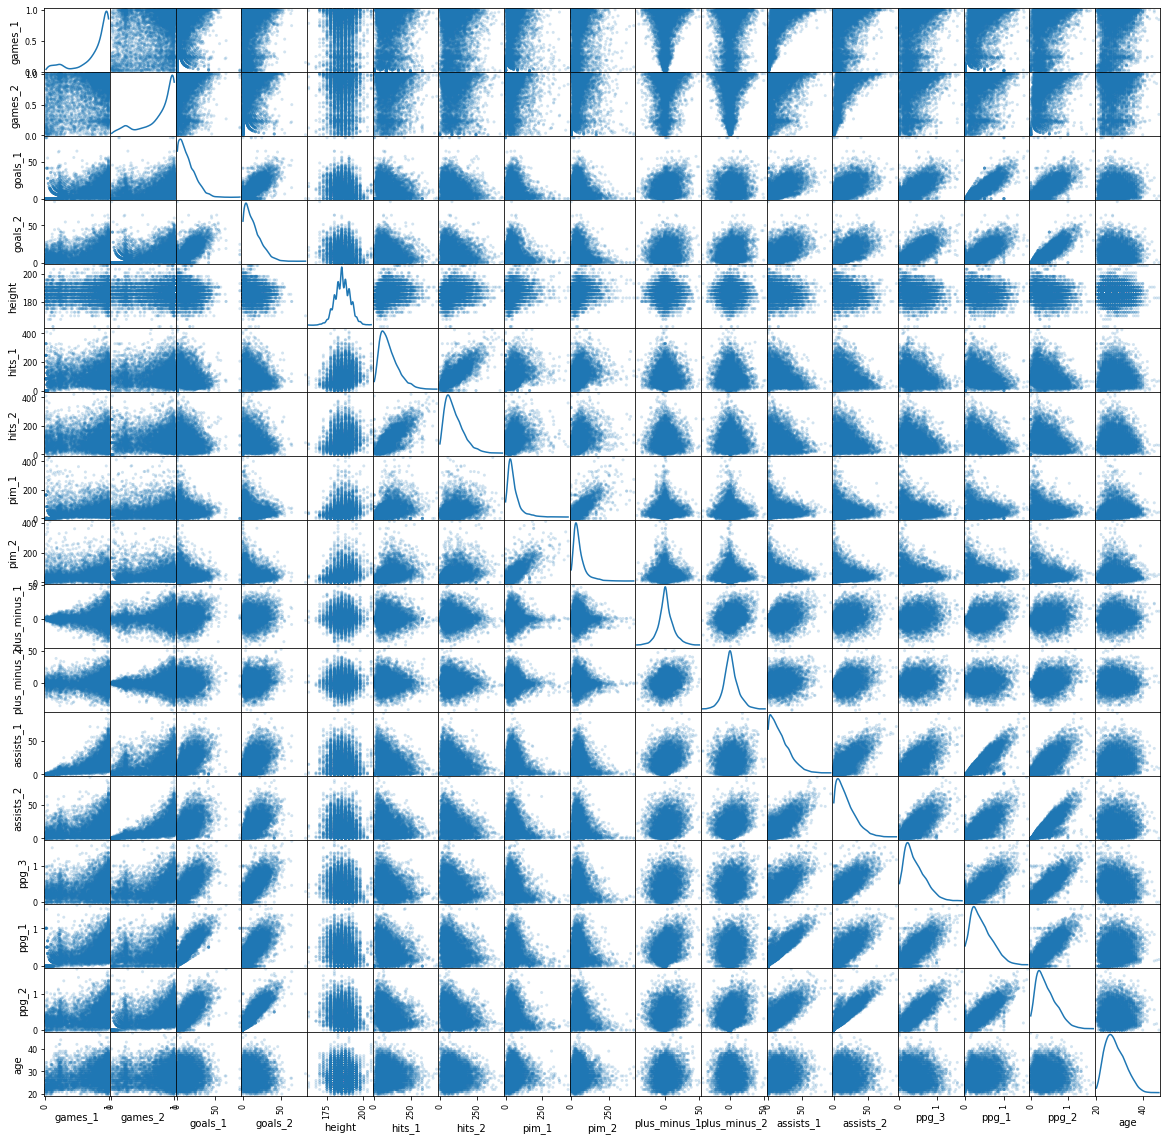

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_f, alpha=0.2, figsize = (20,20), diagonal = "kde");

# Preparing data for modeling 

In [50]:
# import libraries for modeling

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Splitting Numericals and Categoricals

In [51]:
X_num = df_f.select_dtypes(include = np.number) # extracting numericals
X_num = X_num.reset_index(drop = True)

In [52]:
X_cat = df_f.drop(X_num, axis =1)
X_cat = X_cat.reset_index(drop = True)

In [53]:
X_cat

,position
0,L
1,L
2,L
3,L
4,L
...,...
6771,D
6772,D
6773,D
6774,D


In [54]:
X_cat['position'].value_counts()

D    2378
C    1882
L    1295
R    1221
Name: position, dtype: int64

## Scaling

### Standard Scaler

In [55]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X_num)

X_std = pd.DataFrame(X_std, columns = X_num.columns)

### Normalizer

In [56]:
from sklearn.preprocessing import Normalizer

nor_scaler = Normalizer()

X_nor = nor_scaler.fit_transform(X_num)

X_nor = pd.DataFrame(X_nor, columns = X_num.columns)

### MinMax Scaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_minmax = nor_scaler.fit_transform(X_num)

X_minmax = pd.DataFrame(X_minmax, columns = X_num.columns)

After trying three diferent scalers, I've reached the conclusion that none of them really have a significant positive impact on my models.  
The reason of that is because the data is already scaled by the number of games played, so I finally decided not to apply any of these scalers.

## Getting dummies

In [58]:
X_cat = pd.get_dummies(X_cat)

In [59]:
X_cat

,position_C,position_D,position_L,position_R
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
6771,0,1,0,0
6772,0,1,0,0
6773,0,1,0,0
6774,0,1,0,0


In [60]:
df_f = pd.concat([X_num, X_cat], axis=1)

In [61]:
df_f

,games_1,games_2,goals_1,goals_2,height,hits_1,hits_2,pim_1,pim_2,plus_minus_1,plus_minus_2,assists_1,assists_2,ppg_3,ppg_1,ppg_2,age,position_C,position_D,position_L,position_R
0,0.817073,0.987805,23.253731,25.308642,182.88,105.253731,160.962963,84.447761,82.000000,19,23,22,35,0.609756,0.611940,0.740741,28,0,0,1,0
1,0.987805,1.000000,25.308642,21.000000,182.88,160.962963,159.000000,82.000000,80.000000,23,8,35,29,0.900000,0.740741,0.609756,29,0,0,1,0
2,1.000000,0.243902,21.000000,28.700000,182.88,159.000000,241.900000,80.000000,65.600000,8,3,29,11,0.640000,0.609756,0.900000,30,0,0,1,0
3,0.243902,0.609756,28.700000,21.320000,182.88,241.900000,183.680000,65.600000,63.960000,3,3,11,19,0.727273,0.900000,0.640000,31,0,0,1,0
4,0.609756,0.804878,21.320000,28.575758,182.88,183.680000,192.575758,63.960000,58.393939,3,18,19,25,0.743902,0.640000,0.727273,32,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771,0.914634,0.865854,6.560000,3.464789,193.04,75.440000,50.816901,43.733333,32.338028,-8,4,25,37,0.528302,0.413333,0.563380,33,0,1,0,0
6772,0.865854,0.646341,3.464789,4.641509,193.04,50.816901,41.773585,32.338028,43.320755,4,-5,37,25,0.250000,0.563380,0.528302,34,0,1,0,0
6773,0.646341,0.780488,4.641509,2.562500,193.04,41.773585,29.468750,43.320755,20.500000,-5,-26,25,14,0.438356,0.528302,0.250000,35,0,1,0,0
6774,0.780488,0.890244,2.562500,6.739726,193.04,29.468750,59.534247,20.500000,29.205479,-26,26,14,26,0.227273,0.250000,0.438356,36,0,1,0,0


In [62]:
df_f.describe()

,games_1,games_2,goals_1,goals_2,height,hits_1,hits_2,pim_1,pim_2,plus_minus_1,plus_minus_2,assists_1,assists_2,ppg_3,ppg_1,ppg_2,age,position_C,position_D,position_L,position_R
count,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000,6776.000000
mean,0.717189,0.744156,12.702814,12.689910,185.959038,99.607160,96.789473,54.105062,52.693574,0.829103,0.576299,17.031877,17.422521,0.406262,0.416320,0.419256,28.116588,0.277745,0.350945,0.191116,0.180195
std,0.305723,0.281227,10.668746,10.437382,5.310299,62.913500,62.681880,45.991530,43.199327,10.739946,10.892000,13.974173,13.822348,0.272861,0.272386,0.267928,4.230968,0.447920,0.477301,0.393209,0.384378
min,0.012195,0.012195,0.000000,0.000000,162.560000,0.000000,0.000000,0.000000,0.000000,-42.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,0.536585,0.597561,4.241379,4.315789,182.880000,52.251705,49.631579,25.725490,25.771429,-5.000000,-6.000000,6.000000,7.000000,0.197183,0.207317,0.211538,25.000000,0.000000,0.000000,0.000000,0.000000
50%,0.841463,0.865854,10.250000,10.394366,185.420000,86.049383,83.131088,42.000000,41.000000,0.000000,0.000000,14.000000,14.000000,0.351351,0.368421,0.368421,28.000000,0.000000,0.000000,0.000000,0.000000
75%,0.963415,0.975610,19.000000,18.923077,190.500000,134.641975,132.139583,68.627934,65.815789,6.000000,6.000000,25.000000,25.000000,0.573211,0.588235,0.585366,31.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,82.000000,82.000000,205.740000,426.400000,426.400000,426.400000,410.000000,50.000000,52.000000,92.000000,92.000000,1.681818,1.609756,1.681818,47.000000,1.000000,1.000000,1.000000,1.000000


## Split data into dependent and independent variables 

In [63]:
X = df_f.drop('ppg_3', axis=1)
y = df_f['ppg_3']

## Train - Test - split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Modeling

## Model 1 - Linear Model

In [65]:
# import library
from sklearn import linear_model

### Defining Linear Model

In [66]:
lm = linear_model.LinearRegression()

### Fitting model to train data

In [67]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluating Model 1

### Predicting the response for test data

In [68]:
lm_pred = lm.predict(X_test)

### Obtaining the accuracy of the prediction

In [69]:
# obtain the mean squared error
mse_lm = mean_squared_error(y_test, lm_pred)
print('Without scaling and droping just some columns - MSE:',mse_lm)

Without scaling and droping just some columns - MSE: 0.02350893053179411


In [70]:
# obtain the root mean squared error
import math 
rmse_lm = math.sqrt(mse_lm)
print('Without scaling and droping just some columns - RMSE:',rmse_lm)

Without scaling and droping just some columns - RMSE: 0.1533262225837254


In [71]:
# obtain the R2 Score
r2_lm = r2_score(y_test, lm_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_lm)

Without scaling and droping just some columns - R2 Score: 0.6971001515083777


In [72]:
# obtain the mean absolute error
mae_lm = mean_absolute_error(y_test, lm_pred)
print('Without scaling and droping just some columns - MAE:',mae_lm)

Without scaling and droping just some columns - MAE: 0.11508686842426168


## Model 2 -  Decision Tree

In [73]:
# import library
from sklearn.tree import DecisionTreeRegressor

### Defining Decision Tree Model

In [74]:
dt=DecisionTreeRegressor(random_state=40)

### Fitting the model to train data

In [75]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=40)

## Evaluating Model 2

### Predicting the response for test data

In [76]:
dt_pred = dt.predict(X_test)

### Obtaining the accuracy of the prediction

In [77]:
# obtain the mean squared error
mse_dt = mean_squared_error(y_test, dt_pred)
print('Without scaling and droping just some columns - MSE:',mse_dt)

Without scaling and droping just some columns - MSE: 0.0490486798757297


In [78]:
# obtain the root mean squared error
import math 
rmse_dt = math.sqrt(mse_dt)
print('Without scaling and droping just some columns - RMSE:',rmse_dt)

Without scaling and droping just some columns - RMSE: 0.22146936554686225


In [79]:
# obtain the R2 Score
r2_dt = r2_score(y_test, dt_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_dt)

Without scaling and droping just some columns - R2 Score: 0.36803430156128003


In [80]:
# obtain the mean squared error
mae_dt = mean_absolute_error(y_test, dt_pred)
print('Without scaling and droping just some columns - MAE:',mae_dt)

Without scaling and droping just some columns - MAE: 0.16571033160493956


## Model 3 - Random Forest

In [81]:
# import library
from sklearn.ensemble import RandomForestRegressor

### Defining Random Forest Model

In [82]:
rf = RandomForestRegressor(n_estimators=20, random_state=0)

### Fitting model to train data

In [83]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

## Evaluating Model 3

### Predicting the response for test data

In [84]:
rf_pred = rf.predict(X_test)

### Obtaining de accuracy of the prediction

In [85]:
# obtain the mean squared error
mse_rf = mean_squared_error(y_test, rf_pred)
print('Without scaling and droping just some columns - MSE:',mse_rf)

Without scaling and droping just some columns - MSE: 0.024805425489814036


In [86]:
# obtain the root mean squared error
import math 
rmse_rf = math.sqrt(mse_rf)
print('Without scaling and droping just some columns - RMSE:',rmse_rf)

Without scaling and droping just some columns - RMSE: 0.15749738248559572


In [87]:
# obtain the R2 Score
r2_rf = r2_score(y_test, rf_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_rf)

Without scaling and droping just some columns - R2 Score: 0.680395515547874


In [88]:
# obtain the mean absolute error
mae_rf = mean_absolute_error(y_test, rf_pred)
print('Without scaling and droping just some columns - MAE:',mae_rf)

Without scaling and droping just some columns - MAE: 0.11727361488020446


## Model 4 - Stack Best Of Model - lm, dt, rf

In [89]:
from sklearn.ensemble import StackingRegressor 

### Defining Stacked Best Of Model

In [90]:
estimators_simple=[('lm',linear_model.LinearRegression()),
                   ('dt',DecisionTreeRegressor(random_state=40)),
                   ('rf', RandomForestRegressor(n_estimators=20, random_state=0))]
regr_stack_simple1=StackingRegressor(estimators=estimators_simple)

### Fitting the model to train data

In [91]:
regr_stack_simple1.fit(X_train,y_train)

StackingRegressor(estimators=[('lm', LinearRegression()),
                              ('dt', DecisionTreeRegressor(random_state=40)),
                              ('rf',
                               RandomForestRegressor(n_estimators=20,
                                                     random_state=0))])

## Evaluating Model 4

### Predicting the response for test data

In [92]:
best1_pred = regr_stack_simple1.predict(X_test)

### Obtaining the accuracy of the prediction

In [93]:
# obtain the mean squared error
mse_best1 = mean_squared_error(y_test, best1_pred)
print('Without scaling and droping just some columns - MSE:',mse_best1)

Without scaling and droping just some columns - MSE: 0.023213690601146367


In [94]:
# obtain the root mean squared error
import math 
rmse_best1 = math.sqrt(mse_best1)
print('Without scaling and droping just some columns - RMSE:',rmse_best1)

Without scaling and droping just some columns - RMSE: 0.15236039708909388


In [95]:
# obtain the R2 Score
r2_best1 = r2_score(y_test, best1_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_best1)

Without scaling and droping just some columns - R2 Score: 0.7009041582513017


In [96]:
# obtain the mean absolute error
mae_best1 = mean_absolute_error(y_test, best1_pred)
print('Without scaling and droping just some columns - MAE:',mae_best1)

Without scaling and droping just some columns - MAE: 0.11419642879310647


## Model 5 - Stack Best Of Model - lm, rf

### Defining Stacked Best Of Model

In [97]:
estimators_simple=[('lm',linear_model.LinearRegression()),
                   ('rf', RandomForestRegressor(n_estimators=20, random_state=0))]
regr_stack_simple2=StackingRegressor(estimators=estimators_simple)

### Fitting the model to train data

In [98]:
regr_stack_simple2.fit(X_train,y_train)

StackingRegressor(estimators=[('lm', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(n_estimators=20,
                                                     random_state=0))])

## Evaluating Model 5

### Predicting the response for test data

In [99]:
best2_pred = regr_stack_simple2.predict(X_test)

### Obtaining the accuracy of the prediction

In [100]:
# obtain the mean squared error
mse_best2 = mean_squared_error(y_test, best2_pred)
print('Without scaling and droping just some columns - MSE:',mse_best2)

Without scaling and droping just some columns - MSE: 0.023213571629698514


In [101]:
# obtain the root mean squared error
import math 
rmse_best2 = math.sqrt(mse_best2)
print('Without scaling and droping just some columns - RMSE:',rmse_best2)

Without scaling and droping just some columns - RMSE: 0.15236000666086397


In [102]:
# obtain the R2 Score
r2_best2 = r2_score(y_test, best2_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_best2)

Without scaling and droping just some columns - R2 Score: 0.7009056911340281


In [103]:
# obtain the mean absolute error
mae_best2 = mean_absolute_error(y_test, best2_pred)
print('Without scaling and droping just some columns - MAE:',mae_best2)

Without scaling and droping just some columns - MAE: 0.1142490777423813


## Model 6 - Neural Network

In [104]:
import autokeras as ak
import tensorflow as tf

In [105]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0,
                                            mode='auto', baseline=None, restore_best_weights=False)

nn = ak.StructuredDataRegressor(overwrite=True, max_trials=30)

nn.fit(X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=70,
        callbacks=[callback])

Trial 30 Complete [00h 00m 09s]
val_loss: 0.027727700769901276

Best val_loss So Far: 0.024590134620666504
Total elapsed time: 00h 03m 21s
INFO:tensorflow:Oracle triggered exit


2021-12-16 15:22:53.949460: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_regressor/best_model/assets


## Evaluating Model 6

### Predicting the response for test data

In [108]:
nn_pred = nn.predict(X_test)

43/43 [==============================] - 0s 538us/step


### Obtaining the accuracy of the prediction

In [109]:
# obtain the mean squared error
mse_nn = mean_squared_error(y_test, nn_pred)
print('Without scaling and droping just some columns - MSE:',mse_nn)

Without scaling and droping just some columns - MSE: 0.024590135883616488


In [110]:
# obtain the root mean squared error
import math 
rmse_nn = math.sqrt(mse_nn)
print('Without scaling and droping just some columns - RMSE:',rmse_nn)

Without scaling and droping just some columns - RMSE: 0.15681242260617137


In [111]:
# obtain the R2 Score
r2_nn = r2_score(y_test, nn_pred)
print('Without scaling and droping just some columns - R2 Score:',r2_nn)

Without scaling and droping just some columns - R2 Score: 0.6831694056238546


In [112]:
# obtain the mean absolute error
mae_nn = mean_absolute_error(y_test, nn_pred)
print('Without scaling and droping just some columns - MAE:',mae_nn)

Without scaling and droping just some columns - MAE: 0.11944108328737442


## Comparing Models

In [113]:
import bcolors
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [116]:
print('lm:','R2:',r2_lm,'RMSE:',rmse_lm,'MSE:',mse_lm, 'MAE:', mae_lm)
print(bcolors.WARNING + 'best1:', 'R2:',r2_best1 ,'RMSE:',rmse_best1 ,'MSE:',mse_best1, 'MAE:', mae_best1, bcolors.ENDC)
print('best2:','R2:',r2_best2,'RMSE:',rmse_best2,'MSE:',mse_best2, 'MAE:', mae_best2)
print('dt:','R2:',r2_dt,'RMSE:',rmse_dt,'MSE:',mse_dt, 'MAE:', mae_dt)
print('rf:','R2:',r2_rf,'RMSE:',rmse_rf,'MSE:',mse_rf, 'MAE:', mae_rf)
print('NN:','R2:',r2_nn,'RMSE:',rmse_nn,'MSE:',mse_nn, 'MAE:', mae_nn)

lm: R2: 0.6971001515083777 RMSE: 0.1533262225837254 MSE: 0.02350893053179411 MAE: 0.11508686842426168
best1: R2: 0.7009041582513017 RMSE: 0.15236039708909388 MSE: 0.023213690601146367 MAE: 0.11419642879310647 
best2: R2: 0.7009056911340281 RMSE: 0.15236000666086397 MSE: 0.023213571629698514 MAE: 0.1142490777423813
dt: R2: 0.36803430156128003 RMSE: 0.22146936554686225 MSE: 0.0490486798757297 MAE: 0.16571033160493956
rf: R2: 0.680395515547874 RMSE: 0.15749738248559572 MSE: 0.024805425489814036 MAE: 0.11727361488020446
NN: R2: 0.6831694056238546 RMSE: 0.15681242260617137 MSE: 0.024590135883616488 MAE: 0.11944108328737442


After trying different models, I came into the conlusion that the one with which I obtained the best results was the **Best Of Model -_Model 4_** with Linear Model, Decision Tree and Random Forest.  
Applying this model, the MAE of my predictions is just about 0.1142, which means that my predictions are wrong just by approximately 9.4 points per season.  
These results are quite good as during the season a player plays 82 games. 

# Using Model 4 to predict which players will have a better performance this season

## Scrapping data from this season

In order to be able to work fluently, I've decided to dowload df as a csv and use it for the model instead of using the live data.  
The results should be the same as the live data is actualised at the end of each season.  
In case anyone would like to use the model in the future, he could just use the code from above for scrapping.

## Reading data

In [117]:
df_pred = pd.read_csv('players_to_predict_NaN.csv')

In [118]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3333 non-null   object
 1   position      3333 non-null   object
 2   country       3333 non-null   object
 3   birthday      3333 non-null   object
 4   id            3333 non-null   int64 
 5   height        3333 non-null   object
 6   weight        3333 non-null   int64 
 7   goals_1       3333 non-null   int64 
 8   assists_1     3333 non-null   int64 
 9   pim_1         3333 non-null   int64 
 10  games_1       3333 non-null   int64 
 11  hits_1        3333 non-null   int64 
 12  shots_1       3333 non-null   int64 
 13  time_1        3333 non-null   object
 14  plus_minus_1  3333 non-null   int64 
 15  goals_2       3333 non-null   int64 
 16  assists_2     3333 non-null   int64 
 17  pim_2         3333 non-null   int64 
 18  games_2       3333 non-null   int64 
 19  hits_2

## Processing data

In [119]:
# drop nulls
df_pred = df_pred.dropna()
df_pred = df_pred.reset_index(drop = True)

# weight is measured in pounds - transform it to kilo grams which are the units that I'm used to
df_pred['weight'] = df_pred['weight'] * 0.45359237 # convertion ratio
df_pred['weight'] = round(df_pred['weight'], 2)

# height is measured in feet and inches - transform to centimeters
df_pred['height'] = df_pred['height'].apply(get_cms)

# use the player's birthday to obtain his age in his 3rd season
df_pred['season_3'] = df_pred['season_3'].astype(str)
df_pred['age'] = df_pred['season_3'].apply(lambda t: int(t[:4])) - df_pred['birthday'].apply(lambda t: int(t.split('-')[0]))
df_pred['birthday']=pd.to_datetime(df_pred['birthday'], errors = "coerce") # changing type to DateTime

# create game per season columns
## season 1
df_pred['games_per_season_1'] = df_pred.apply(lambda _: '', axis=1)
for i in range(len(df_pred['season_1'])):
    df_pred['games_per_season_1'][i] = 70
df_pred['games_per_season_1'] = df_pred['games_per_season_1'].astype(int)
## season 2
df_pred['games_per_season_2'] = df_pred.apply(lambda _: '', axis=1)
for i in range(len(df_pred['season_2'])):
    df_pred['games_per_season_2'][i] = 56
df_pred['games_per_season_2'] = df_pred['games_per_season_2'].astype(int)

# change time format
df_pred['time_1'] = df_pred['time_1'].apply(lambda i: int(str(i).split(':')[0]))
df_pred['time_2'] = df_pred['time_2'].apply(lambda i: int(str(i).split(':')[0]))

# change seasons format
## season 1
df_pred['season_1'] = df_pred['season_1'].apply(lambda i: (str(i)[:4]) + '-' + (str(i))[4:])
df_pred['season_1'] = df_pred['season_1'].apply(lambda i: str(i)[2:5] + str(i)[7:])
## season 2
df_pred['season_2'] = df_pred['season_2'].apply(lambda e: (str(e)[:4]) + '-' + (str(e))[4:])
df_pred['season_2'] = df_pred['season_2'].apply(lambda e: str(e)[2:5] + str(e)[7:])
## season 3
df_pred['season_3'] = df_pred['season_3'].apply(lambda a: (str(a)[:4]) + '-' + (str(a))[4:])
df_pred['season_3'] = df_pred['season_3'].apply(lambda a: str(a)[2:5] + str(a)[7:])

# create points columns
df_pred['ppg_1'] = (df_pred['goals_1'] + df_pred['assists_1']) / df_pred['games_1']
df_pred['ppg_2'] = (df_pred['goals_2'] + df_pred['assists_2']) / df_pred['games_2']

# convert total stats into stats per game
df_pred['games_1'] = df_pred['games_1'] / df_pred['games_per_season_1']
df_pred['games_2'] = df_pred['games_2'] / df_pred['games_per_season_2']
df_pred['goals_1'] = df_pred['goals_1'] / df_pred['games_1']
df_pred['goals_2'] = df_pred['goals_2'] / df_pred['games_2']
df_pred['hits_1'] = df_pred['hits_1'] / df_pred['games_1']
df_pred['hits_2'] = df_pred['hits_2'] / df_pred['games_2']
df_pred['pim_1'] = df_pred['pim_1'] / df_pred['games_1']
df_pred['pim_2'] = df_pred['pim_2'] / df_pred['games_2']

In [120]:
df_pred_f = df_pred[['games_1', 'games_2', 'goals_1', 'goals_2',
           'height', 'hits_1', 'hits_2', 'pim_1',
           'pim_2', 'plus_minus_1', 'plus_minus_2', 'assists_1', 'assists_2', 'position', 'ppg_1', 'ppg_2', 'age']]

In [121]:
df_pred_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   games_1       741 non-null    float64
 1   games_2       741 non-null    float64
 2   goals_1       741 non-null    float64
 3   goals_2       741 non-null    float64
 4   height        741 non-null    float64
 5   hits_1        741 non-null    float64
 6   hits_2        741 non-null    float64
 7   pim_1         741 non-null    float64
 8   pim_2         741 non-null    float64
 9   plus_minus_1  741 non-null    int64  
 10  plus_minus_2  741 non-null    int64  
 11  assists_1     741 non-null    int64  
 12  assists_2     741 non-null    int64  
 13  position      741 non-null    object 
 14  ppg_1         741 non-null    float64
 15  ppg_2         741 non-null    float64
 16  age           741 non-null    int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 98.5+ KB


In [122]:
X_pred_num = df_pred_f.select_dtypes(include = np.number) # extracting numericals
X_pred_num = X_pred_num.reset_index(drop = True)
X_pred_cat = df_pred_f.drop(X_pred_num, axis =1) # extracting categoricals
X_pred_cat = X_pred_cat.reset_index(drop = True)

In [123]:
X_pred_cat = pd.get_dummies(X_pred_cat) # get dummies

In [124]:
df_pred_f = pd.concat([X_pred_num, X_pred_cat], axis=1)

## Getting predictions array

In [125]:
player_points_pred = regr_stack_simple1.predict(df_pred_f) #predict response for current season teams

In [126]:
player_points_pred

array([0.26171098, 0.35592911, 0.05245421, 0.4569619 , 0.41686816,
       0.37516013, 0.27440412, 0.14033668, 0.64412625, 0.32788331,
       0.15578297, 0.18883726, 0.17718662, 0.19332915, 0.17475261,
       0.1676508 , 0.61008055, 0.21902294, 0.18514538, 0.35032985,
       0.42447354, 0.36965158, 0.21827674, 0.16844571, 0.36293013,
       0.24312165, 0.22881552, 0.20264895, 0.14393297, 0.18077317,
       0.07950866, 0.24548423, 0.55541909, 0.3885646 , 0.25027103,
       0.11864025, 0.32546358, 0.21721125, 0.33726172, 0.68800509,
       0.30954768, 0.45357252, 1.04823122, 0.680393  , 0.28720104,
       0.48420701, 0.26071049, 0.19695909, 0.34183216, 0.26455768,
       0.8199909 , 0.57732543, 0.56790208, 0.55378142, 0.38540416,
       0.2771123 , 0.35434239, 0.2526382 , 0.32759105, 0.17817726,
       0.195202  , 0.21437684, 0.27721746, 0.26921454, 0.22050642,
       0.34798606, 0.2829254 , 0.31633562, 0.23888941, 0.25293903,
       0.1924971 , 0.19460613, 0.50580291, 0.19542285, 0.26400

## Creating dataframes with predicted points per player

In [127]:
# create dataframe with points predictions
points = []
for i in range(len(player_points_pred)):
    points.append({'player_points_pred': player_points_pred[i]})
player_points_pred_df = pd.DataFrame(points)

In [128]:
player_points_pred_df.head() #visualisation

,player_points_pred
0,0.261711
1,0.355929
2,0.052454
3,0.456962
4,0.416868


In [129]:
df_player_pts = pd.merge(df_pred, player_points_pred_df, left_index=True, right_index=True)

In [130]:
df_player_pts

,name,position,country,birthday,id,height,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,time_1,...,shots_3,time_3,plus_minus_3,season_1,season_2,season_3,team_1,team_2,age,games_per_season_1,games_per_season_2,ppg_1,ppg_2,player_points_pred
0,Eric Staal,C,CAN,1984-10-29,8470595,193.04,88.45,20.151515,28,29.696970,0.942857,25.454545,113,1130,...,0,0,0,19-20,20-21,21-22,Minnesota Wild,Montréal Canadiens,37,70,56,0.712121,0.142857,0.261711
1,Ryan Suter,D,USA,1985-01-21,8470600,185.42,90.72,8.115942,40,12.173913,0.985714,48.695652,111,1700,...,0,0,0,19-20,20-21,21-22,Minnesota Wild,Minnesota Wild,36,70,56,0.695652,0.339286,0.355929
2,Braydon Coburn,D,CAN,1985-02-27,8470601,195.58,101.60,1.750000,3,28.000000,0.571429,103.250000,44,562,...,0,0,0,19-20,20-21,21-22,Tampa Bay Lightning,New York Islanders,36,70,56,0.100000,0.000000,0.052454
3,Jeff Carter,C,CAN,1985-01-01,8470604,190.50,99.34,19.833333,10,42.000000,0.857143,77.000000,182,1016,...,0,0,0,19-20,20-21,21-22,Los Angeles Kings,Pittsburgh Penguins,36,70,56,0.450000,0.785714,0.456962
4,Dustin Brown,R,USA,1984-11-04,8470606,182.88,92.99,18.030303,18,23.333333,0.942857,151.666667,169,1214,...,0,0,0,19-20,20-21,21-22,Los Angeles Kings,Los Angeles Kings,37,70,56,0.530303,0.632653,0.416868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,Evan Rodrigues,C,CAN,1993-07-28,8478542,180.34,83.46,10.000000,0,40.000000,0.100000,40.000000,11,77,...,0,0,0,19-20,20-21,21-22,Pittsburgh Penguins,Pittsburgh Penguins,28,70,56,0.142857,0.400000,0.326521
737,Artemi Panarin,L,RUS,1991-10-30,8478550,182.88,79.38,32.463768,63,20.289855,0.985714,25.362319,209,1421,...,0,0,0,19-20,20-21,21-22,New York Rangers,New York Rangers,30,70,56,1.376812,1.380952,1.046788
738,Noel Acciari,C,USA,1991-12-01,8478569,177.80,94.80,21.212121,7,22.272727,0.942857,128.333333,108,1053,...,0,0,0,19-20,20-21,21-22,Florida Panthers,Florida Panthers,30,70,56,0.409091,0.268293,0.277357
739,Dean Kukan,D,CHE,1993-07-08,8478567,187.96,86.18,2.121212,4,25.454545,0.471429,50.909091,51,527,...,0,0,0,19-20,20-21,21-22,Columbus Blue Jackets,Columbus Blue Jackets,28,70,56,0.151515,0.142857,0.169497


In [131]:
# add a column of points prediction to the dataframe
df_player_pts['pred_rank'] = df_player_pts['player_points_pred'].rank(ascending=False).astype(float).astype(int)
df_player_pts = df_player_pts.sort_values('pred_rank') # visualisation of teams sorted by predicted points
df_player_pts = df_player_pts.reset_index(drop = True) # re-index
df_player_pts

,name,position,country,birthday,id,height,weight,goals_1,assists_1,pim_1,games_1,hits_1,shots_1,time_1,...,time_3,plus_minus_3,season_1,season_2,season_3,team_1,team_2,age,games_per_season_1,games_per_season_2,ppg_1,ppg_2,player_points_pred,pred_rank
0,Connor McDavid,C,CAN,1997-01-13,8478402,185.42,87.54,37.187500,63,30.625000,0.914286,40.468750,212,1399,...,0,0,19-20,20-21,21-22,Edmonton Oilers,Edmonton Oilers,24,70,56,1.515625,1.875000,1.382209,1
1,Leon Draisaitl,C,DEU,1995-10-27,8477934,187.96,94.35,42.394366,67,17.746479,1.014286,26.619718,218,1605,...,0,0,19-20,20-21,21-22,Edmonton Oilers,Edmonton Oilers,26,70,56,1.549296,1.500000,1.198367,2
2,Nathan MacKinnon,C,CAN,1995-09-01,8477492,182.88,90.72,35.507246,58,12.173913,0.985714,51.739130,318,1464,...,0,0,19-20,20-21,21-22,Colorado Avalanche,Colorado Avalanche,26,70,56,1.347826,1.354167,1.083092,3
3,Auston Matthews,C,USA,1997-09-17,8479318,190.50,92.99,47.000000,33,8.000000,1.000000,40.000000,290,1467,...,0,0,19-20,20-21,21-22,Toronto Maple Leafs,Toronto Maple Leafs,24,70,56,1.142857,1.269231,1.048231,4
4,Artemi Panarin,L,RUS,1991-10-30,8478550,182.88,79.38,32.463768,63,20.289855,0.985714,25.362319,209,1421,...,0,0,19-20,20-21,21-22,New York Rangers,New York Rangers,30,70,56,1.376812,1.380952,1.046788,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,Nate Thompson,C,USA,1984-10-05,8470775,185.42,92.99,0.000000,1,90.000000,0.100000,150.000000,5,88,...,0,0,19-20,20-21,21-22,Philadelphia Flyers,Winnipeg Jets,37,70,56,0.142857,0.113636,0.079509,737
737,Yannick Weber,D,CHE,1988-09-23,8474134,180.34,90.72,1.707317,2,23.902439,0.585714,63.170732,45,574,...,0,0,19-20,20-21,21-22,Nashville Predators,Pittsburgh Penguins,33,70,56,0.073171,0.000000,0.078259,738
738,Micheal Haley,L,CAN,1986-03-30,8474230,180.34,96.62,3.181818,0,159.090909,0.314286,114.545455,9,121,...,0,0,19-20,20-21,21-22,New York Rangers,Ottawa Senators,35,70,56,0.045455,0.000000,0.058063,739
739,Braydon Coburn,D,CAN,1985-02-27,8470601,195.58,101.60,1.750000,3,28.000000,0.571429,103.250000,44,562,...,0,0,19-20,20-21,21-22,Tampa Bay Lightning,New York Islanders,36,70,56,0.100000,0.000000,0.052454,740


In [132]:
df_player_pts.to_csv(r'players_performance_pred.csv', index = False)